Goal is to simulate eigenvalues of adjacency matrix.

If i can find a D-regular adjacency matrix with a smallest eigenvalue as close as possible to zero, this will bound $f(G) \le m(1/2 + -\lambda_n / \sqrt{D})$.

### test code

In [1]:
# from scipy.sparse import identity
# from scipy.sparse.linalg import eigs

# A = identity(10, format='csc')
# A.setdiag(range(1, 11))
# eigs(A, 3, sigma=0) # find three eigenvalues near zero using shift-invert mode

## get random regular graphs

In [2]:
from networkx.linalg.graphmatrix import adjacency_matrix

In [3]:
from networkx.generators.random_graphs import random_regular_graph

In [4]:
from scipy.sparse.linalg import eigs
from scipy.sparse import identity

In [6]:
def get_smallest_eigenvalue_random(D, n):
    """Generates a random D-regular graph and returns its smallest eigenvalue."""
    A = adjacency_matrix(random_regular_graph(D, n))
    A.setdiag([D]*n)
    return eigs(A.asfptype(), which='SM', k=1)[0][0].real - D

In [117]:
trials = 1000
max([get_smallest_eigenvalue_random(2, 200) for _ in range(trials)])

-1.9976644536646535

In [107]:
from math import log

In [116]:
log(4.94)/log(8)

0.7681703472699845

In [111]:
log(5.59)/log(10)

0.7474118078864233

## Other testing

In [119]:
import matplotlib.pyplot as plt

In [120]:
import numpy as np

In [123]:
from numpy import cos

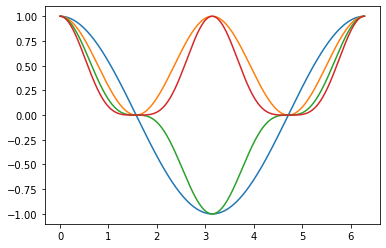

In [152]:
inps = np.linspace(0, 2*np.pi, 1000)
plt.plot(inps, cos(inps))
plt.plot(inps, cos(inps)**2)
plt.plot(inps, cos(inps)**3)
plt.plot(inps, cos(inps)**4)

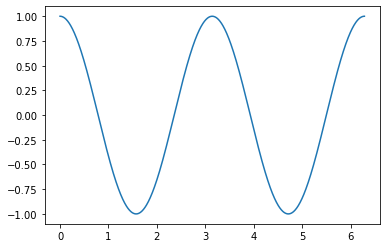

In [153]:
plt.plot(inps, cos(2*inps))

In [154]:
cos(np.pi/4)**2

0.5000000000000001

In [155]:
from numpy import cos, sin, tan, pi

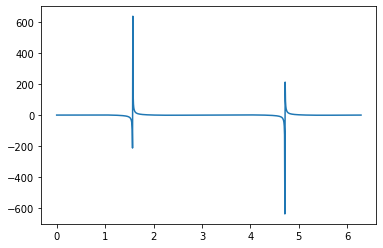

In [156]:
plt.plot(inps, 0.5*sin(4*inps) - cos(4*inps)*tan(inps))

(-4, 4)

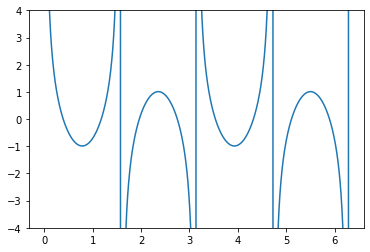

In [164]:
plt.plot(inps, cos(4*inps) / (sin(2*inps) + 0.01))
plt.ylim(-4, 4)

In [165]:
def f(D, Y):
    return (1/8)*(D-1)**0.5*((D-1)/D)**(D-2-2*Y)*(1 - ((D-2)/D)**Y)

In [198]:
f(10, 1)

0.03985807499999999

/home/kunal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  


(-4, 4)

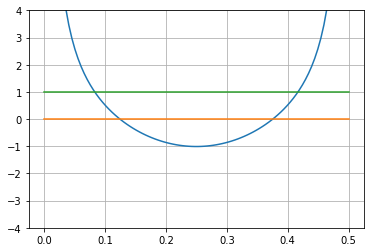

In [216]:
inps =np.linspace(0, pi/2, 100)
plt.plot(inps/pi, cos(4*inps)/(sin(2*inps)) - f(100, 1))
plt.plot(inps/pi, [0]*len(inps))
plt.plot(inps/pi, [1]*len(inps))

plt.grid()
plt.ylim(-4, 4)

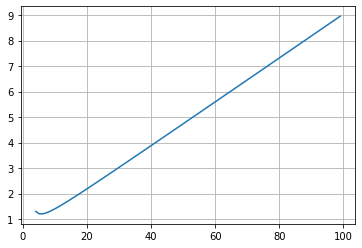

In [214]:
r = range(4, 100)
plt.plot(r, [f(d, d)**2 for d in r])
plt.grid()

In [182]:
def test(D, Y):
    return 2*(D-1-Y)*(D**-0.5)*(-1) + 2*(D-1-Y)*(D**-0.5)*((D-2)/D)**Y + 4*Y*(D-1)*(D**-1.5)*((D-2)/D)**(Y-1)

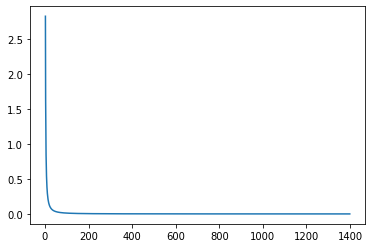

In [188]:
plt.plot(r, [test(d, 3) for d in r])

In [246]:
inps = np.linspace(0, pi/2, 1000)

/home/kunal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


(-10, 10)

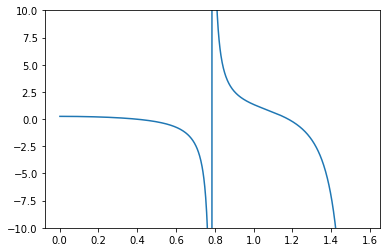

In [247]:
plt.plot(inps, tan(inps)/tan(4*inps))
plt.ylim(-10, 10)

In [248]:
def ex(D, Y, g):
    num = sin(g)**-2 - D
    den = 1 - D + Y + Y*cos(2*g)**(Y-1)*((1 - cos(2*g))/(1+cos(2*g)**Y))
    return num/den

/home/kunal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in double_scalars
  
/home/kunal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


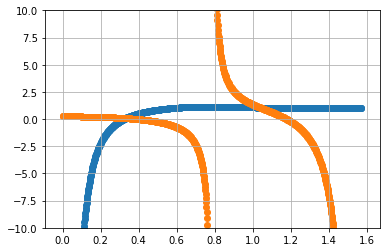

In [249]:
plt.scatter(inps, [ex(10, 2, g) for g in inps])
plt.scatter(inps, tan(inps)/tan(4*inps))
plt.ylim(-10, 10)
plt.grid()

In [251]:
def test2(D, Y, g):
    c = cos(g)
    s = sin(g)
    c2 = cos(2*g)
    return 0.25*c**(2*(D-Y-1))*(1/(1 - D*s*s))*(2*Y*s*s*(1 + c2**(Y-1)) - (1 - D*s)**2*(1 - c2**Y))

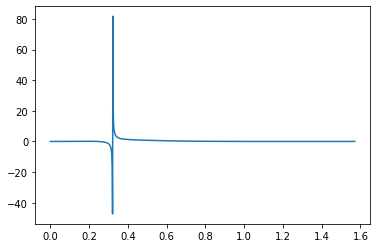

In [254]:
plt.plot(inps, [test2(10, 5, g) for g in inps])

In [253]:
np.arctan(1/3)

0.3217505543966422

In [255]:
def test3(D, Y, g):
    s = sin(g)
    c2 = cos(2*g)
    num = s**-2 - D
    den = 1 - D + Y + Y*c2**(Y-1)*((1 + c2)/(1 - c2**Y))
    return num/den

/home/kunal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  after removing the cwd from sys.path.
/home/kunal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in double_scalars
  """
/home/kunal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in double_scalars
  


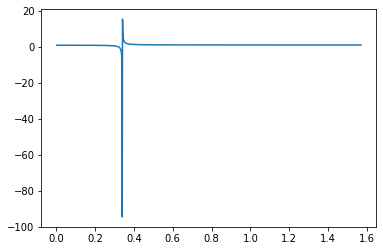

In [256]:
plt.plot(inps, [test3(10, 1, g) for g in inps])

In [269]:
inps = np.linspace(0, pi/2, 1000)

/home/kunal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.


(-10, 10)

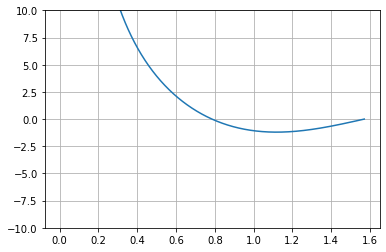

In [270]:
plt.plot(inps, 4*(1/tan(inps) - sin(2*inps)))
plt.grid()
plt.ylim(-10, 10)

### another test

In [12]:
import numpy as np
from numpy import pi, cos, sin
from matplotlib import pyplot as plt

In [63]:
def f(b, g):
    D=20
    return 2*cos(4*b)*sin(g)*cos(g)**(D-1) - 0.5*sin(b)*cos(b)*(1 - cos(2*g)**(D-1))

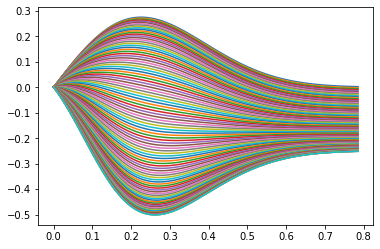

In [68]:
inps=np.linspace(0, pi/4, 100)
for i in inps:
    plt.plot(inps, [f(i, g) for g in inps])

In [65]:
def f2(b, g):
    D=20
    return 0.5*sin(4*b)*cos(g)**(D-2)*(1-D*sin(g)**2) + 0.5*sin(b)**2*cos(2*g)**(D-2)*(1-D)*sin(2*g)

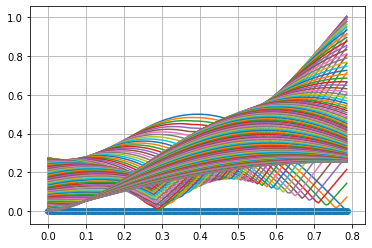

In [66]:
inps=np.linspace(0, pi/4, 128)
for i in inps:
    plt.plot(inps, [abs(f(j, i)) + abs(f2(j, i)) for j in inps])
plt.scatter(inps, [0]*len(inps))
plt.grid()

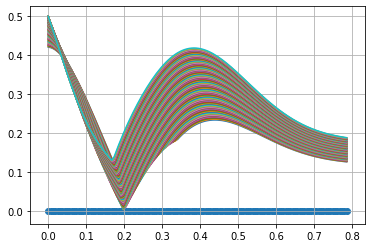

In [69]:
inps=np.linspace(0, pi/4, 128)
for i in np.linspace(0.25, 0.4, 100):
    plt.plot(inps, [abs(f(i, j)) + abs(f2(i, j)) for j in inps])
plt.scatter(inps, [0]*len(inps))
plt.grid()

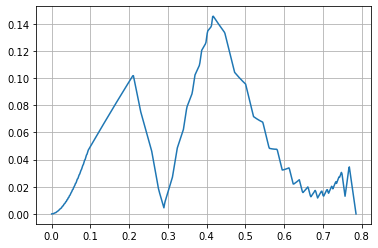

In [70]:
gs = np.linspace(0, pi/4, 500)
inps = np.linspace(0, 2*pi, 500)
plt.plot(gs, [min([abs(f(i, j)) + abs(f2(i, j)) for j in inps]) for i in gs])
plt.grid()

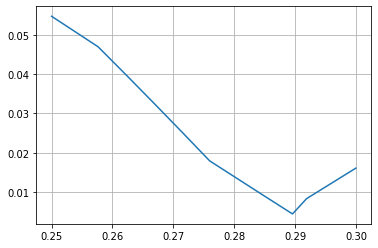

In [71]:
gs = np.linspace(0.25, 0.3, 500)
inps = np.linspace(0, 2*pi, 500)
plt.plot(gs, [min([abs(f(i, j)) + abs(f2(i, j)) for j in inps]) for i in gs])
plt.grid()

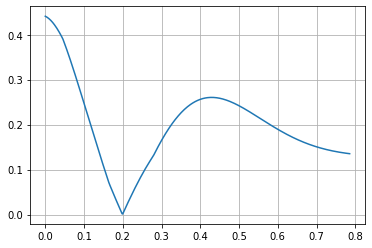

In [72]:
gs = np.linspace(0.27, 0.3, 500)
inps = np.linspace(0, pi/4, 500)
plt.plot(inps, [min([abs(f(i, j)) + abs(f2(i, j)) for i in gs]) for j in inps])
plt.grid()